In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
import numpy as np
# from statsmodels.tsa.arima.model import ARIMA

In [5]:
df = pd.read_csv("all_scaled_1750-2022.csv")

In [45]:
temp = df.iloc[0,5:]
# temp = temp[-50:]

In [46]:
model = 4iFhPbG8x3GnhJFTS9yK(temp, seasonal=False,  # Set seasonal=True if working with seasonal data
                      stepwise=True, trace=True,   # stepwise speeds up the search
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-279.838, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-245.949, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-259.023, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-260.853, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-244.632, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-261.866, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-257.620, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-279.557, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-258.859, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-255.565, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-259.527, Time=0.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-277.948, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-277.612, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

In [47]:
# Summary of the best ARIMA model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  273
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 145.919
Date:                Thu, 19 Sep 2024   AIC                           -279.838
Time:                        16:58:05   BIC                           -258.203
Sample:                    01-01-1750   HQIC                          -271.152
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0284      0.016      1.735      0.083      -0.004       0.060
ar.L1          0.1256      0.027      4.699      0.000       0.073       0.178
ar.L2         -0.8356      0.034    -24.556      0.0

In [48]:
periods = 50
forecast = model.predict(n_periods=periods)

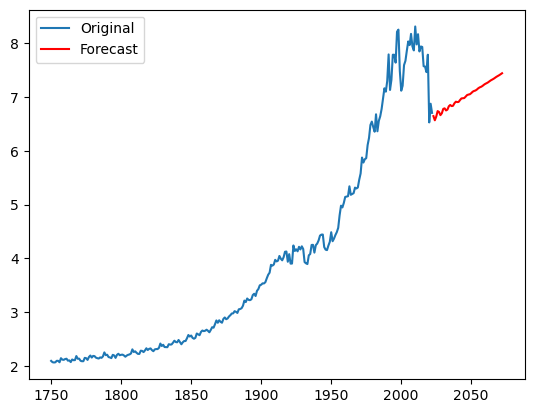

In [49]:
# print(forecast)

# Plot original data and forecast
plt.plot(np.arange(1750,2023), temp, label='Original')
# plt.plot(np.arange(1973,2023), temp, label='Original')
# future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=5, freq='M')
plt.plot(np.arange(2023, 2023 + periods), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

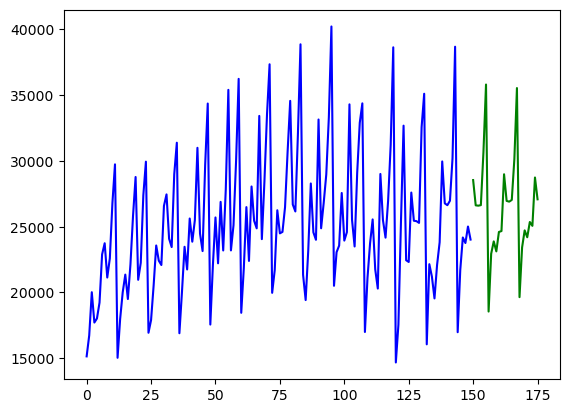

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future


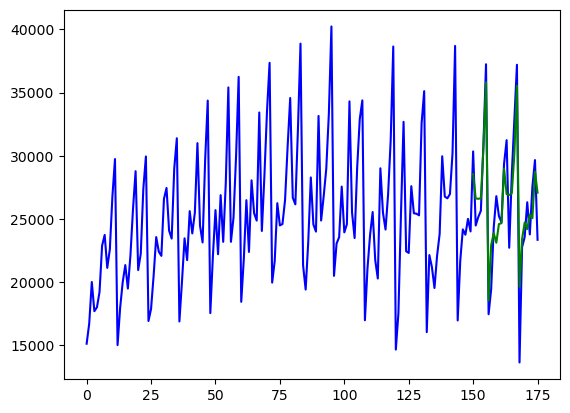

In [44]:

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x, y, c='blue')
# plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()